<a href="https://colab.research.google.com/github/jsalafica/Data-Science-I/blob/master/ProyectoDS_ParteI_Salafica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Proyecto Data Science - Parte I - Javier Salafica

# üìå Abstract

El presente proyecto tiene como objetivo analizar los accidentes de tr√°nsito ocurridos en la ciudad de Nueva York durante el a√±o 2020, utilizando un dataset p√∫blico que contiene informaci√≥n detallada de cada siniestro, incluyendo fecha, hora, ubicaci√≥n, cantidad de heridos y fallecidos, tipo de veh√≠culos involucrados, y factores contribuyentes al accidente.

El an√°lisis busca explorar los patrones temporales, geogr√°ficos y causales de los accidentes, con el fin de identificar posibles factores de riesgo y proponer l√≠neas de trabajo para la prevenci√≥n. El a√±o 2020 presenta adem√°s particularidades en el contexto de la pandemia por COVID-19, que alter√≥ significativamente los h√°bitos de movilidad urbana, permitiendo tambi√©n observar eventuales cambios en la din√°mica de los siniestros viales.

A trav√©s de an√°lisis exploratorios y visualizaciones multivariadas, se intentar√° responder preguntas de investigaci√≥n relacionadas a la distribuci√≥n de accidentes por municipio, su severidad, los factores m√°s frecuentes que contribuyen a los siniestros, y la interacci√≥n entre el horario y el tipo de veh√≠culo involucrado. Finalmente, se identificar√°n patrones relevantes y valores faltantes presentes en los datos, como primer paso para futuros modelos predictivos o descriptivos en seguridad vial.



#‚ùìPreguntas e hip√≥tesis

1. ¬øEn qu√© Municipio de NYC ocurren m√°s accidentes? (Hip√≥tesis: Brooklyn y Bronx concentran m√°s accidentes por su densidad de tr√°nsito)
2. ¬øQu√© horarios concentran m√°s accidentes? (Hip√≥tesis: Horas pico)
3. ¬øQu√© tipo de veh√≠culo est√° m√°s involucrado? (Hip√≥tesis: Sedanes)
4. ¬øCu√°les son los factores contribuyentes m√°s frecuentes? (Hip√≥tesis: Driver inattention y Unspecified)
5. ¬øExiste relaci√≥n entre tipo de veh√≠culo y cantidad de heridos?


#üìä Visualizaciones y An√°lisis

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar CSV desde GitHub directamente
url = 'https://raw.githubusercontent.com/jsalafica/Data-Science-I/master/NYC_Accidents_2020.csv'
df = pd.read_csv(url)

print(df.shape)
df.head()


(74881, 29)


CRASH DATE CRASH TIME   BOROUGH  ZIP CODE  LATITUDE  LONGITUDE  \
0  2020-08-29   15:40:00     BRONX   10466.0  40.89210 -73.833760   
1  2020-08-29   21:00:00  BROOKLYN   11221.0  40.69050 -73.919914   
2  2020-08-29   18:20:00       NaN       NaN  40.81650 -73.946556   
3  2020-08-29   00:00:00     BRONX   10459.0  40.82472 -73.892960   
4  2020-08-29   17:10:00  BROOKLYN   11203.0  40.64989 -73.933890   

                     LOCATION   ON STREET NAME CROSS STREET NAME  \
0   POINT (-73.83376 40.8921)     PRATT AVENUE     STRANG AVENUE   
1  POINT (-73.919914 40.6905)  BUSHWICK AVENUE   PALMETTO STREET   
2  POINT (-73.946556 40.8165)         8 AVENUE               NaN   
3  POINT (-73.89296 40.82472)              NaN               NaN   
4  POINT (-73.93389 40.64989)              NaN               NaN   

       OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                  NaN  ...                    Unspecified   
1                  NaN  ...                    Unspecified   
2                  NaN  ...                            NaN   
3  1047 SIMPSON STREET  ...                    Unspecified   
4   4609 SNYDER AVENUE  ...                    Unspecified   

   CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                    Unspecified                    Unspecified   
4                            NaN                            NaN   

   CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
0                            NaN       4342908   
1                            NaN       4343555   
2                            NaN       4343142   
3                            NaN       4343588   
4                            NaN       4342953   

                   VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
0                                Sedan  Station Wagon/Sport Utility Vehicle   
1                                Sedan                                Sedan   
2  Station Wagon/Sport Utility Vehicle                                  NaN   
3  Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle   
4                                Sedan                                Sedan   

   VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
0                  NaN                 NaN                 NaN  
1                  NaN                 NaN                 NaN  
2                  NaN                 NaN                 NaN  
3                Sedan          Motorcycle                 NaN  
4                  NaN                 NaN                 NaN  

[5 rows x 29 columns]

##Missing Values


In [2]:

# Tipos de datos
print(df.dtypes)

# Valores faltantes
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)

# Estad√≠sticas b√°sicas
print(df.describe())


CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED          int64
NUMBER OF PERSONS KILLED           int64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

##üìà 1. An√°lisis Univariado

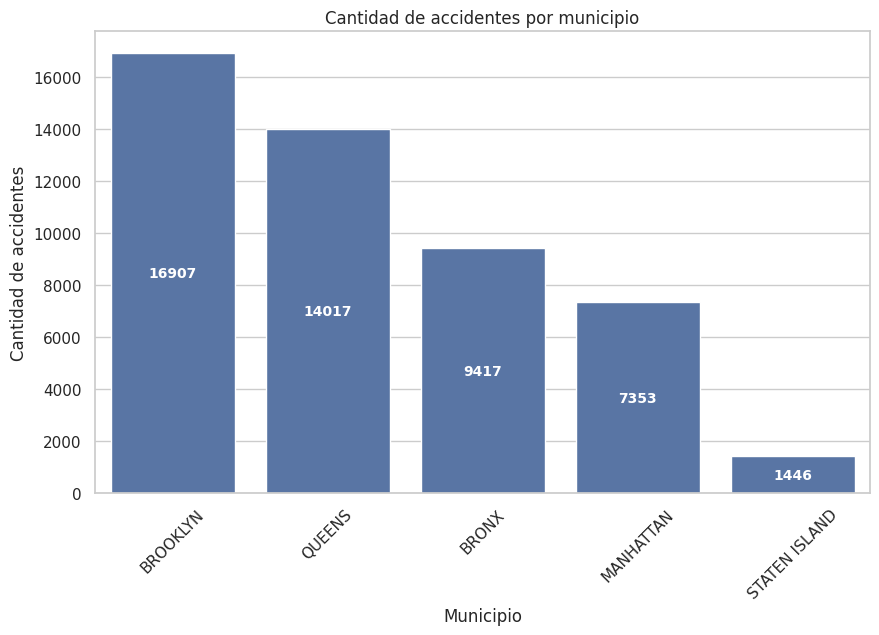

In [11]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Cantidad de accidentes por municipio
plt.figure(figsize=(10,6))
ax = sns.countplot(x='BOROUGH', data=df, order=df['BOROUGH'].value_counts().index)
plt.title("Cantidad de accidentes por municipio")
plt.xlabel("Municipio")
plt.ylabel("Cantidad de accidentes")

# Mostrar los valores sobre cada barra
#for p in ax.patches:
#    height = p.get_height()
#    ax.text(p.get_x() + p.get_width()/2., height + 50, int(height), ha="center")

# Mostrar los valores centrados en las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height / 2,
        s=int(height),
        ha='center',
        va='center',
        color='white',  # o negro si el fondo es claro
        fontsize=10,
        fontweight='bold'
    )

plt.xticks(rotation=45)
plt.show()

##üîÄ 2. An√°lisis Bivariado

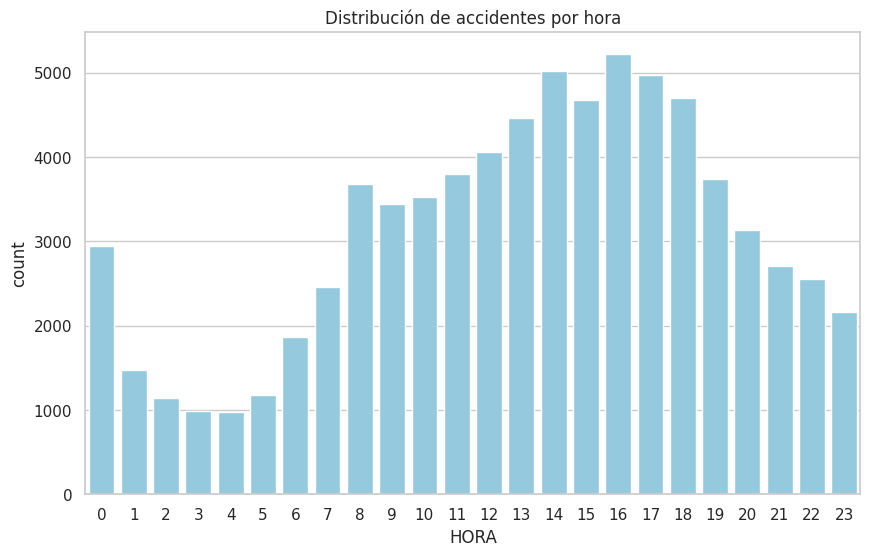

In [4]:
# Distribuci√≥n de accidentes por hora
df['HORA'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M:%S', errors='coerce').dt.hour
plt.figure(figsize=(10,6))
sns.countplot(x='HORA', data=df, color='skyblue')
plt.title("Distribuci√≥n de accidentes por hora")
plt.show()

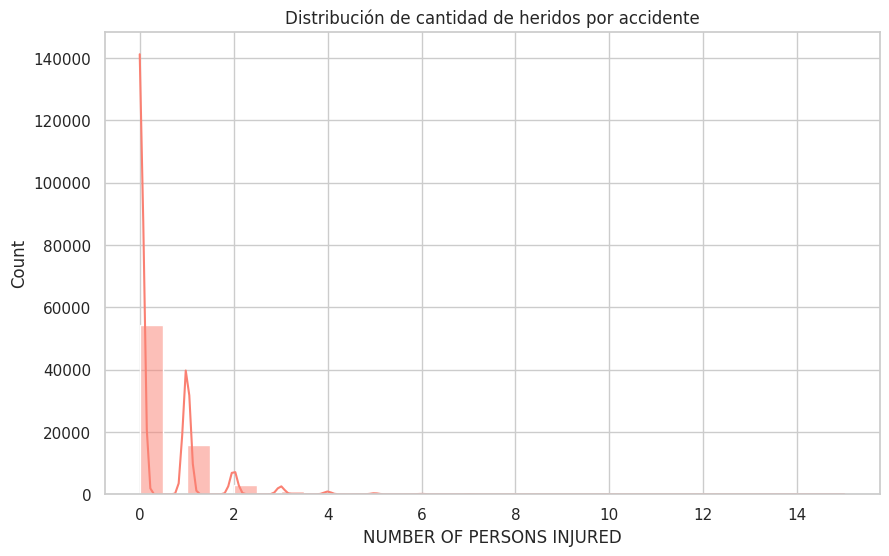

In [5]:
# Distribuci√≥n de personas heridas
plt.figure(figsize=(10,6))
sns.histplot(df['NUMBER OF PERSONS INJURED'], bins=30, kde=True, color='salmon')
plt.title("Distribuci√≥n de cantidad de heridos por accidente")
plt.show()

##üîÅ 3. An√°lisis Multivariado

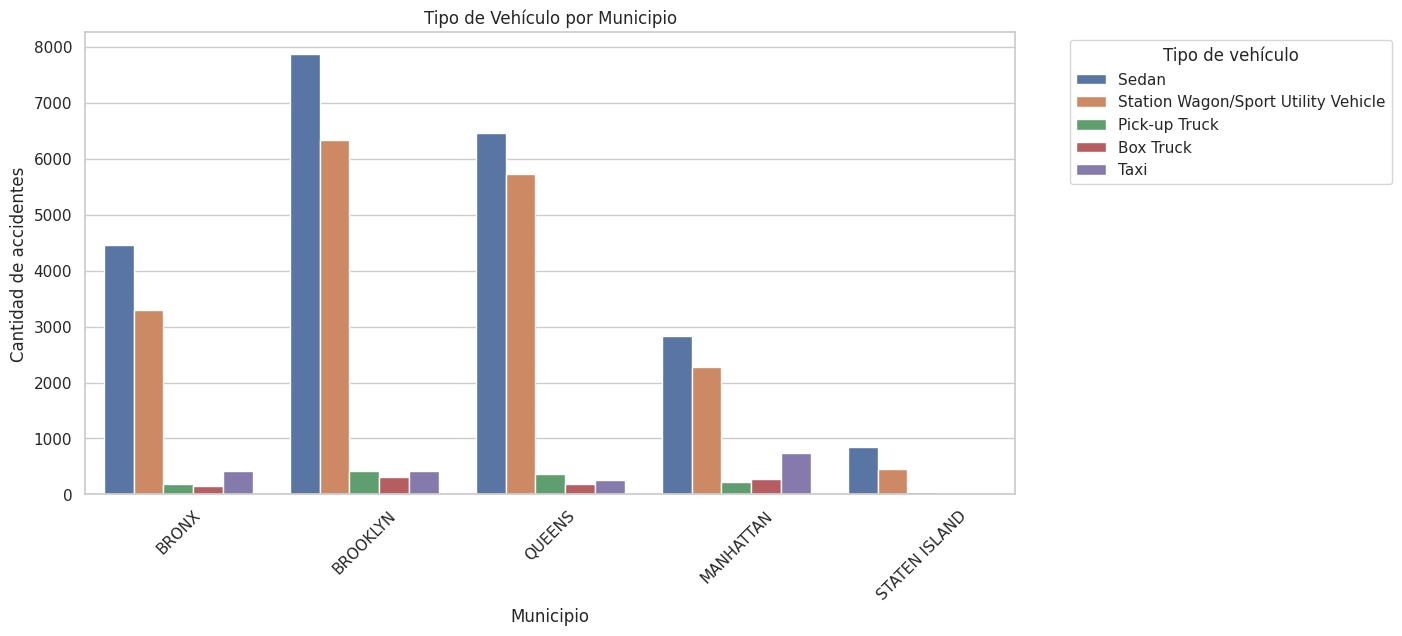

In [6]:

# Primero filtramos los municipios
top_boroughs = df['BOROUGH'].value_counts().head(5).index
df_top = df[df['BOROUGH'].isin(top_boroughs)]

# Ahora filtramos los 5 tipos de veh√≠culos m√°s frecuentes
top_vehicles = df['VEHICLE TYPE CODE 1'].value_counts().head(5).index
df_top = df_top[df_top['VEHICLE TYPE CODE 1'].isin(top_vehicles)]

# Graficamos el multivariado
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='BOROUGH', hue='VEHICLE TYPE CODE 1')
plt.title('Tipo de Veh√≠culo por Municipio')
plt.xlabel('Municipio')
plt.ylabel('Cantidad de accidentes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de veh√≠culo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

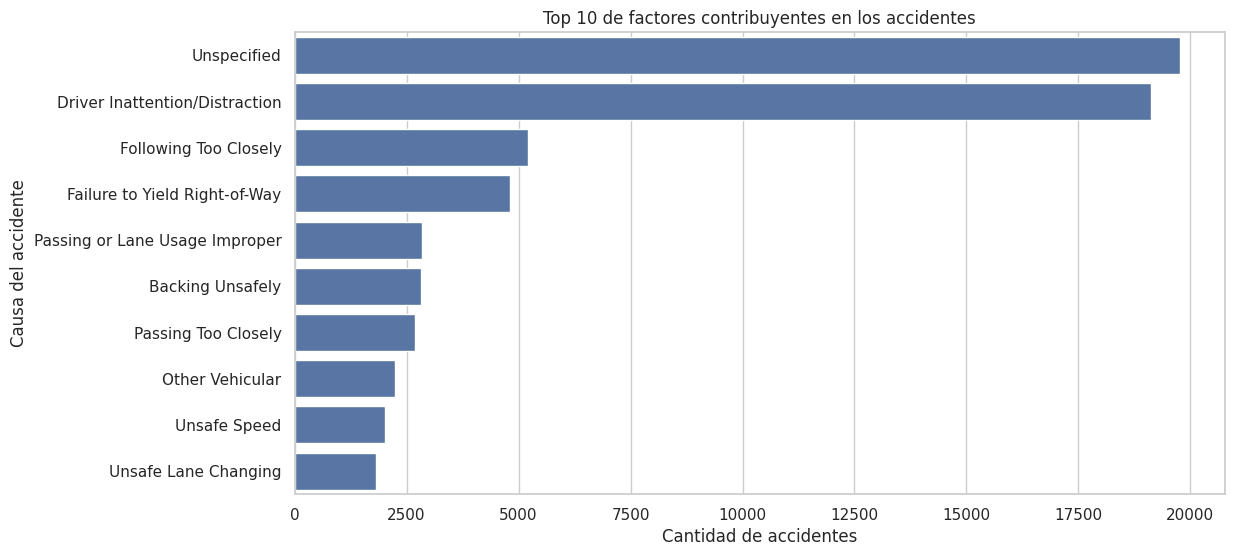

In [7]:
# Factores contribuyentes m√°s frecuentes
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified')
plt.figure(figsize=(12,6))
top_causas = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().nlargest(10)
sns.barplot(x=top_causas.values, y=top_causas.index)
plt.title("Top 10 de factores contribuyentes en los accidentes")
plt.xlabel("Cantidad de accidentes")
plt.ylabel("Causa del accidente")
plt.show()

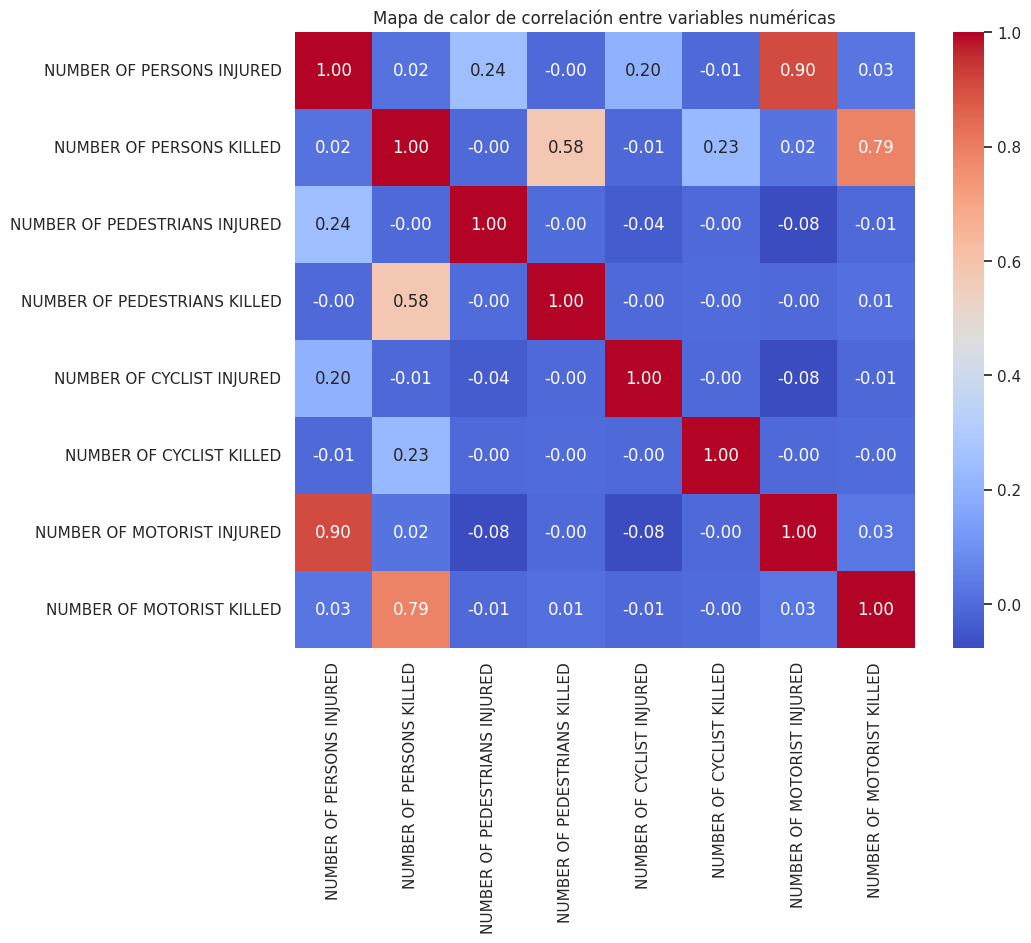

In [8]:
# Seleccionamos s√≥lo las columnas num√©ricas de inter√©s
cols_corr = [
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED',
    'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED',
    'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED',
    'NUMBER OF MOTORIST KILLED'
]

# Calculamos la matriz de correlaci√≥n
corr = df[cols_corr].corr()

# Graficamos el heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de correlaci√≥n entre variables num√©ricas")
plt.show()


#‚úÖ Conclusiones preliminares

A partir del an√°lisis exploratorio inicial del dataset de accidentes de tr√°nsito de la ciudad de Nueva York (2020), se observan los siguientes hallazgos:

- Brooklyn y el Bronx concentran mayor cantidad de accidentes.
- Los accidentes se concentran durante la ma√±ana y la tarde (horas pico).
- Los accidentes con muchos heridos son pocos; la mayor√≠a tiene 0 a 2 heridos.
- Los Sedanes son el tipo de veh√≠culo m√°s involucrado.
- "Unspecified" y "Driver Inattention/Distraction" son los factores contribuyentes m√°s frecuentes.
- Se observan algunos boroughs con m√°s heridos cuando est√°n involucrados veh√≠culos como motocicletas o SUVs.

Este an√°lisis inicial permite tener un panorama general de los accidentes y sentar bases para futuras etapas de modelado predictivo.
